In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime

Uwaga - na samym dole dzieło mojego życia (a bardziej tego tygodnia), więc przeklikać się do końca proszę

# LOSOWE INFO O JAWORZU

In [2]:
N = 7026 ##liczba osób w Jaworzu
# kod: 24;02;06;2
t = 10000

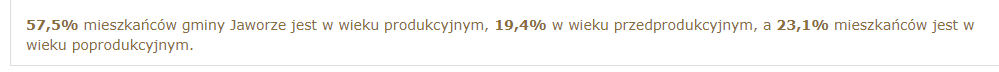

wiek produkcyjny: wiek zdolności do pracy, tj. dla mężczyzn grupa wieku 18-64 lata, dla kobiet - 18-59 lat <br>
czyli takie 18-60

# WCZYTANIE PLIKÓW CSV

In [3]:
##nazwiska męskie i kobiece
nm = pd.read_csv("NM.csv")
nm = nm[nm["Liczba"] > t] ## imiona za tym t=1000 są z dupy - takie pojedyncze crazy ahmiry szmiry
nk = pd.read_csv("NK.csv")
nk = nk[nk["Liczba"] > t]
nk = nk["Nazwisko aktualne"]
nm = nm["Nazwisko aktualne"]

In [4]:
##imiona męskie i kobiece
im = pd.read_csv("IM.csv")
im = im[im["LICZBA WYSTĄPIEŃ"] > t] 
ik = pd.read_csv("IK.csv")
ik = ik[ik["LICZBA_WYSTĄPIEŃ"] > t]
ik = ik["IMIĘ_PIERWSZE"]
im = im["IMIĘ PIERWSZE"]

In [5]:
##ulice z jaworza
ulice = pd.read_csv("ULIC.csv", sep=";")
ulice_jaworze = ulice.query('WOJ == 24 & POW == 2 & GMI == 6 & RODZ_GMI == 2')
ulice_jaworze = np.array(ulice_jaworze["NAZWA_1"])

In [6]:
##gry
gry = pd.read_csv("GRY.csv")
gry

,ID,NAZWA,RODZAJ,CENA,CZAS_GRY,MIN_GRACZY,MAX_GRACZY,MIN_WIEK,TURNIEJOWE
0,1,Brass: Birmingham,"ekonomiczna, strategiczna",250,150,2,4,14,0
1,2,Star Wars: Rebelia,"strategiczna, science-fiction",390,210,2,4,14,0
2,3,Wojna o Pierścień: Druga edycja,"przygodowa, fantasy",330,150,2,4,13,0
3,4,Zaginiona Wyspa Arnak,"przygodowa, eksploracyjna",150,90,1,4,12,0
4,5,Zamki Burgundii: BIG BOX,strategiczna,140,60,2,4,12,0
...,...,...,...,...,...,...,...,...,...
95,96,Eurobusiness,"ekonomiczna, rywalizacyjna",30,90,2,5,14,0
96,97,Boop,"logiczna, rywalizacyjna",160,20,2,2,10,0
97,98,Mordercze krewetki,"karciane, towarzyskie",80,10,2,6,7,0
98,99,The binding of Isaac: Four souls,"przygodowa, karciana",190,45,2,4,13,0


# LUDNOŚĆ

In [7]:
def ludzie(mi, ki, mn, kn, ul, pk= 0.516, N=7349 ):
    imie = []
    nazwisko = []
    wiek = []
    adres = []
    tel = []
    
    for n in range(N):
        
        p = random.random()
        
        if p < pk: ##losujemy kobietę
            imie.append(random.choice(ki))
            nazwisko.append(random.choice(kn))
        
        else: #losujemy mężczyznę
            imie.append(random.choice(mi))
            nazwisko.append(random.choice(mn))
        
        p = random.random()
        
        if p < 0.575: ##dane statystyczne - 57.5% osób jest w wieku produkcyjnym
            wiek.append(random.randint(18,60))
        elif p < 0.77:
            wiek.append(random.randint(8, 18)) ##19.4% w przedprodukcyjnym
        else:
            wiek.append(random.randint(60,99)) ##reszta starsza
            
            
        p = random.random()   
        if p< 0.90:
            adres.append(random.choice(ul) + ' ' + str(random.randint(1,100)))
            
            p = random.random()
            if p< 0.90:
                tel.append(random.randint(500000000, 999999999))
            else:
                tel.append("NULL")
                
        else:
            adres.append("NULL")
            tel.append(random.randint(500000000, 999999999))
        
        
            
    
    return pd.DataFrame({"ID": range(1,N+1), "IMIĘ": imie, "NAZWISKO": nazwisko, "WIEK": wiek, "ADRES": adres, "TELEFON": tel})

In [8]:
ludzie(im, ik, nm, nk, ulice_jaworze) ## numer telefonu

,ID,IMIĘ,NAZWISKO,WIEK,ADRES,TELEFON
0,1,GRAŻYNA,PAWLAK,31,Zielona 88,910802485
1,2,OKSANA,SOKOŁOWSKA,14,Spadzista 74,781697047
2,3,ANDREI,ADAMSKI,76,Wapienicka 71,651843567
3,4,MARCEL,DOMAŃSKI,75,Jałowcowa 35,708128588
4,5,DANUTA,KOWALIK,99,Brzozowa 42,528690119
...,...,...,...,...,...,...
7344,7345,IWONA,MUCHA,67,NULL,564649300
7345,7346,EDYTA,WÓJTOWICZ,90,Rodzinna 75,688589697
7346,7347,GRACJAN,JAWORSKI,72,NULL,736620051
7347,7348,AGATA,BRZEZIŃSKA,22,Brzozowa 47,994721510


# WIEK A PRAWDOPODOBIEŃSTWO PRZYJŚCIA

In [9]:
def transform_wiek(wiek): 
    ## funkcja zwracająca częstość z jaką dana  osoba na podst wieku mogłaby nas odwiedzać (czyli jakby pp ze nas odwiedzi)
    
    if wiek < 10:
        return 1
    elif wiek < 12:
        return 2
    elif wiek < 16:
        return 3
    elif wiek < 20:
        return 5
    elif wiek < 30:
        return 6
    elif wiek < 38:
        return 5
    elif wiek < 45:
        return 4
    elif wiek < 55:
        return 3
    elif wiek < 70:
        return 2
    else:
        return 1


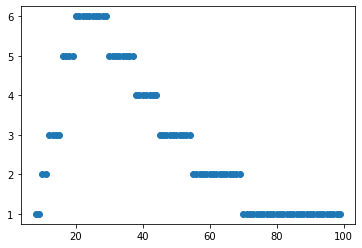

In [10]:
x = np.arange(8,100, 1)
y = [transform_wiek(xx) for xx in x]
plt.scatter(x,y)

In [11]:
aa = ludzie(im, ik, nm, nk, ulice_jaworze, 0.516, N=75) ##wrzucam to do df bo tak
aa["PP"] = [transform_wiek(aa["WIEK"][x]) for x in range(len(aa))]
aa

,ID,IMIĘ,NAZWISKO,WIEK,ADRES,TELEFON,PP
0,1,IWONA,KAMIŃSKA,58,Cicha 97,805887065,2
1,2,MICHAŁ,MARKIEWICZ,29,Kokosowa 50,767130411,6
2,3,WIKTORIA,WIECZOREK,25,Orzechowa 73,520923745,6
3,4,MARIOLA,ADAMSKA,19,Zajęcza 36,648662796,5
4,5,JOLANTA,SZYMCZAK,9,Irysów 93,850045722,1
...,...,...,...,...,...,...,...
70,71,GABRIELA,CZAJKOWSKA,66,Średnia 24,953899567,2
71,72,IRENEUSZ,NOWACKI,37,Ogrodowa 21,565251759,5
72,73,ZBIGNIEW,BORKOWSKI,23,Na Stoku 65,905338718,6
73,74,WIKTOR,KRAWCZYK,27,Modrzewiowa 38,729037305,6


In [12]:
new = [aa["ID"][x] for x in range(len(aa)) for i in range(int(aa["PP"][x])) ]

## wektor do random choice  - do pojawiania się klientów (ich id)
## tworze wektor w zależności od wartości PP (czyli np 1 wystąpi 3 razy bo takie miała PP i wyjdzie np [1,1,1,2,3,3,3,3,3...])
## no i w ten sposób to że wylosuje się 1 jest bardziej prawdopod. niż że wylosuje się 2, a mniej niż że 3

random.choice(new)

43

-- to co robię tutaj właściwie może się nie przydać, bo to just sprawdzenie czy działa i symulacja odwiedzin -- 

In [12]:
data = [random.choice(new) for _ in range(1000)] ##robię sobie 1000 powtórzeń, czyli 1000 odwiedzin naszego sklepu

In [13]:
count = [data.count(x) for x in range(1,76)] ## zliczam ile razy dane id nas odwiedziło

In [14]:
pd.DataFrame({"ID":range(1,76), "COUNT": count, "WIEK": aa["WIEK"]})
#no i dataframe zeby było widać

,ID,COUNT,WIEK
0,1,9,52
1,2,21,29
2,3,7,50
3,4,8,13
4,5,10,39
...,...,...,...
70,71,11,45
71,72,9,10
72,73,16,46
73,74,14,40


In [25]:
## i dla naszych jaworzańskich danych - troche dłużej się symuluje bo ustawiłam 10000 odwiedzin ogólnie
aa = ludzie(im, ik, nm, nk, ulice_jaworze)
aa["PP"] = [transform_wiek(aa["WIEK"][x]) for x in range(len(aa))]

new = [aa["ID"][x] for x in range(len(aa)) for i in range(int(aa["PP"][x])) ]
data = [random.choice(new) for _ in range(10000)]
count = [data.count(x+1) for x in range(len(aa))]
aa["ODWIEDZINY"] = count
aa
##i można sobie popatrzeć że mniej więcej działa, mamy jakieś odwiedziny i teraz możemy wykluczyć tych, których u nas nie było

,ID,IMIĘ,NAZWISKO,WIEK,ADRES,TELEFON,PP,ODWIEDZINY
0,1,SZCZEPAN,ZAKRZEWSKI,38,Agrestowa 61,983230244,4,1
1,2,IWONA,DOMAŃSKA,71,Promienista 46,567331867,1,0
2,3,MARTYNA,KRÓL,54,Jałowcowa 79,690923199,2,0
3,4,TETIANA,JAROSZ,54,Stroma 100,612892821,2,1
4,5,IRENEUSZ,SIKORSKI,85,Kaczeńcowa 95,978047196,1,0
...,...,...,...,...,...,...,...,...
7344,7345,KATARZYNA,KONIECZNA,44,Miętowa 94,617791857,4,4
7345,7346,NADIA,PAWŁOWSKA,8,Brzoskwiniowa 21,968990396,1,0
7346,7347,RÓŻA,KOWALCZYK,21,Różana 89,753346942,8,1
7347,7348,VOLODYMYR,MUSIAŁ,49,Wiejska 93,882989836,4,0


In [26]:
aa[aa["ODWIEDZINY"] > 0] ##tylko ci co nas odwiedzili chociaż raz

,ID,IMIĘ,NAZWISKO,WIEK,ADRES,TELEFON,PP,ODWIEDZINY
0,1,SZCZEPAN,ZAKRZEWSKI,38,Agrestowa 61,983230244,4,1
3,4,TETIANA,JAROSZ,54,Stroma 100,612892821,2,1
5,6,OSKAR,KUBIAK,14,Azaliowa 70,844138506,4,3
6,7,EDYTA,KRÓL,18,Dzwonkowa 30,NULL,8,1
7,8,MAGDA,SOBCZAK,46,Kolonia Dolna 98,608415460,4,1
...,...,...,...,...,...,...,...,...
7341,7342,AGATA,STANKIEWICZ,17,Zimowa 64,NULL,8,5
7343,7344,DAGMARA,PAWŁOWSKA,88,Liliowa 9,926148817,1,1
7344,7345,KATARZYNA,KONIECZNA,44,Miętowa 94,617791857,4,4
7346,7347,RÓŻA,KOWALCZYK,21,Różana 89,753346942,8,1


----------
# ODWIEDZINY - ALGORYTMY
---

Ustalamy, że:<br>
godziny otwarcia: 9-17 <br>
zakładamy, że przyjścia klientów są realizacjami procesu Poissona z jakąś $\lambda = $ losowa wartość
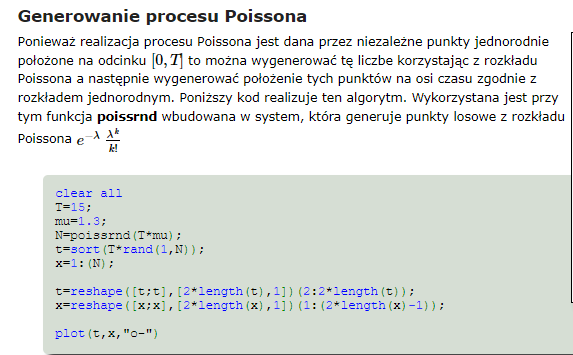


In [13]:
aa = ludzie(im, ik, nm, nk, ulice_jaworze)
aa

,ID,IMIĘ,NAZWISKO,WIEK,ADRES,TELEFON
0,1,ZYGMUNT,JASIŃSKI,14,Jodłowa 43,807198091
1,2,MAŁGORZATA,SZYMCZAK,40,Wiosenna 47,541903335
2,3,EWA,WYSOCKA,11,Pałacowa 24,892481176
3,4,DANIELA,KRAJEWSKA,75,Graniczna 50,587456595
4,5,TOBIASZ,ORŁOWSKI,51,Za Goruszką 41,731782748
...,...,...,...,...,...,...
7344,7345,BLANKA,GRABOWSKA,67,Miodowa 98,820845578
7345,7346,CECYLIA,WRÓBEL,55,Astrów 53,769646809
7346,7347,WIESŁAWA,CHOJNACKA,41,Spadzista 76,NULL
7347,7348,PAULA,BRZEZIŃSKA,58,Niewielka 43,859137355


In [14]:
pp = [transform_wiek(aa["WIEK"][x]) for x in range(len(aa))]

In [15]:
random.choices(aa["ID"], weights=pp , k=5) ##mamy losowanie człowieków którzy nas odwiedzają


[4387, 2082, 3155, 4908, 2316]

In [16]:
T = 8 #[h]
lamb = 10
N = np.random.poisson(T*lamb)
ts = sorted(T*np.random.uniform(0,1, N))

In [17]:
import datetime
  
# Initializing a date and time
start = datetime.datetime(2023, 1, 1, 9, 0, 0)
t_wizyty = [(start + datetime.timedelta(minutes=round(t*60))).strftime("%m/%d/%Y %H:%M:%S") for t in ts]
klient = random.choices(aa["ID"], weights=pp , k=N)
pd.DataFrame({"id_mieszkańca":klient, "wizyta":t_wizyty})

,id_mieszkańca,wizyta
0,4598,01/01/2023 09:12:00
1,746,01/01/2023 09:28:00
2,558,01/01/2023 09:30:00
3,6396,01/01/2023 09:35:00
4,7310,01/01/2023 09:37:00
...,...,...
100,6490,01/01/2023 16:47:00
101,2435,01/01/2023 16:47:00
102,3458,01/01/2023 16:48:00
103,6902,01/01/2023 16:51:00


### FUNKCJA DO INVENTORY

In [20]:
def inven(n = 100): ##funkcja tworząca proste inventory (rental/shop)
    ilosc = np.random.randint(20, 30, n) ## od 20 do 30 każdego z tytułów
    ids = range(1, (n+1))
    ilosci = [ids[x] for x in range(len(ids)) for i in range(ilosc[x])]
    return pd.DataFrame({"id_inv": range(1, (len(ilosci)+1)),"id_tytuł": ilosci })

In [21]:
inv_rent = inven()
inv_shop = inven()

In [169]:
inv_rent

,id_inv,id_tytuł
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
2433,2434,100
2434,2435,100
2435,2436,100
2436,2437,100


In [412]:
inv_rent.value_counts("id_tytuł", sort=False) ## count ile mamy danych tytułów

id_tytuł
1     29
2     38
3     22
4     37
5     22
      ..
92    29
93    34
94    21
95    35
96    36
Length: 96, dtype: int64

#### dni świąteczne:
1 stycznia, 6 stycznia, 
9 kwietnia,
10 kwietnia, 
1 maja,
3 maja, 
8 czerwca

In [19]:
start = datetime.datetime(2023, 1, 2, 9, 0, 0)
swieta = [datetime.datetime(2023, 1, 6, 9, 0, 0), datetime.datetime(2023, 4, 9, 9, 0, 0), 
              datetime.datetime(2023, 4, 10, 9, 0, 0), datetime.datetime(2023, 3, 1, 9, 0, 0), 
              datetime.datetime(2023, 3, 3, 9, 0, 0), datetime.datetime(2023, 6, 8, 9, 0, 0)]
for d in range(1, 10):    
    dzis = start + datetime.timedelta(days=(d))
    if dzis in swieta:
        print(dzis)
    #print(dzis)

2023-01-06 09:00:00


### funkcja symulująca odwiedziny

ODWIEDZINY2 to funkcja uproszczona, raczej patrzeć na ODWIEDZINY()

In [99]:
def odwiedziny2(start = datetime.datetime(2023, 1, 2, 9, 0, 0), lamb = 8, mieszkancy = aa):
    ##start - pierwszy dzień otwarcia czyli 2.01.23 
    ##lamb - lambda potrzebna do symulowania ilości klientów na dzień
    ## mieszkańcy - no mieszkańcy którzy mogą nas nawiedzić
    
    T = 239/30 #7h 58 min bo tyle nasz sklep jest otwarty
    now = datetime.datetime.now()
    days = (now - start).days ##żeby te daty były do dzisiaj
    df = pd.DataFrame({})
    inv = inven()
    swieta = [datetime.datetime(2023, 1, 6, 9, 0, 0), datetime.datetime(2023, 4, 9, 9, 0, 0), 
              datetime.datetime(2023, 4, 10, 9, 0, 0), datetime.datetime(2023, 3, 1, 9, 0, 0), 
              datetime.datetime(2023, 3, 3, 9, 0, 0), datetime.datetime(2023, 6, 8, 9, 0, 0)]
    dd = [(s - start).days + 1 for s in swieta]
    
    for d in range(1, days):
        
        if d%6 == 0 or d%7 == 0 or (d in dd): ## wyłączenie weekendów i świąt
            pass 
        
        else:
            ##odwiedziny zgodne z procesem poissona
            N = np.random.poisson(T*lamb) ##ilość osób na cały dzień
            ts = sorted(T*np.random.uniform(0,1, N)) ##czasy wizyt (takie surowe)
            t_wizyty = [(start + datetime.timedelta(minutes=round(t*60,2))).strftime("%m/%d/%Y %H:%M:%S") for t in ts]
            ##formatka wizyt
            
            ##if czasy pomiedzy wizytami są małe to coś tam
            
                ##losowanie klientów z populacji mieszkańców
            klient = random.choices(mieszkancy["ID"], weights=pp , k=N)
            
                #losowanie sprzedawcy (zakładamy, że sprzedawca 1 i 2 obsługują kasy przez te 8 h)
            sprzedawca = random.choices([1,2], k=N)
            
                ##ktoś może chce kupić kilka gier zamiast jednej
            ilosc = random.choices(np.ceil(np.random.exponential(1,100)), k = N)
            
            ids = inv["id_inv"]
            gra = []
            gry = random.sample(sorted(ids), k = int(sum(ilosc)))   ## sample losuje bez zwracania
            
            for i in range(N):
                g = [gry.pop() for _ in range(int(ilosc[i]))] 
                ##ten pop sprawia że idę po id od tyłu, ale w ten sposób nie ma problemu z indeksami a to na jedno wychodzi
                gra.append(str(g)[1:-1])
            
            ##to jakbyśmy chcieli w inv uwzględniać
            
            ##dołączenie danego dnia do df z poprzednich dni
            day = pd.DataFrame({"id_mieszkańca": klient, "wizyta":t_wizyty,
                                "sprzedawca":sprzedawca, "ilosc":ilosc, "id_gry": gra})
            df = pd.concat([df, day])
                
        ##przejście z datą na kolejny dzień
        start = start + datetime.timedelta(days=1)
        
        ##pytanie czy chcemy mieć też rekordy z dziś dziś
        
    return df

In [118]:
inv_rent = inven()
tt = odwiedziny2()
tt

,id_mieszkańca,wizyta,sprzedawca,ilosc,id_gry
0,58,01/02/2023 09:09:15,1,1.0,1556
1,44,01/02/2023 09:13:43,1,1.0,430
2,26,01/02/2023 09:15:37,1,1.0,2390
3,28,01/02/2023 09:21:47,2,1.0,1157
4,68,01/02/2023 09:31:24,2,2.0,"1927, 115"
...,...,...,...,...,...
50,10,06/16/2023 15:45:54,2,2.0,"977, 1662"
51,2,06/16/2023 16:29:22,2,1.0,527
52,70,06/16/2023 16:30:26,1,1.0,765
53,20,06/16/2023 16:34:15,1,1.0,1436


In [86]:
tt.iloc[220]

id_mieszkańca                   6475
wizyta           01/05/2023 12:18:18
sprzedawca                         1
ilosc                            2.0
id_gry                          2968
Name: 30, dtype: object

In [88]:
tt.iloc[250]

id_mieszkańca                   2296
wizyta           01/05/2023 16:48:50
sprzedawca                         2
ilosc                            1.0
id_gry                          3049
Name: 60, dtype: object

In [22]:
np.array([])

array([], dtype=float64)

-----
## CHYBA NAJWAŻNIEJSZA FUNKCJA JAK NA RAZIE
---

In [252]:
def odwiedziny(start = datetime.datetime(2022, 6, 6, 9, 0, 0), lamb = 4, mieszkancy = aa):
    
    T = 239/30 #7h 58 min bo tyle nasz sklep jest otwarty (z małym buforem, żeby nikt nie kupił czegoś po 1 s od otwarcia)
    now = datetime.datetime.now()
    days = (now - start).days ##żeby te daty były do dzisiaj
    df = pd.DataFrame({})
    inv_ren = inven() ##inventory startowe rental
    inv_shop = inven() ##inentory startowe sklep
    pp = [transform_wiek(mieszkancy["WIEK"][x]) for x in range(len(mieszkancy))] ##wagi dla mieszkancow - pp przyjscia
    
    rental =  pd.DataFrame({"id_inv": [], "return": [], "zniszczona": []}) ##df pomocnicza dla inv rentalowego
    kupno =  pd.DataFrame({"id_inv": [], "kupno": [], "wizyta":[]}) ##dla kupna
    outlet =pd.DataFrame({"id_inv": [], "id_gry": [], "return": []}) ##wektor z inventory id z 
    
    swieta = [datetime.datetime(2023, 1, 6, 9, 0, 0), datetime.datetime(2023, 4, 9, 9, 0, 0), 
              datetime.datetime(2023, 4, 10, 9, 0, 0), datetime.datetime(2023, 3, 1, 9, 0, 0), 
              datetime.datetime(2023, 3, 3, 9, 0, 0), datetime.datetime(2023, 6, 8, 9, 0, 0), 
              datetime.datetime(2022, 6, 16, 9, 0, 0), datetime.datetime(2022, 8, 15, 9, 0, 0),
              datetime.datetime(2022, 11, 1, 9, 0, 0), datetime.datetime(2022, 11, 11, 9, 0, 0),
              datetime.datetime(2022, 12, 25, 9, 0, 0), datetime.datetime(2022, 12, 26, 9, 0, 0),]
    dd = [(s - start).days + 1 for s in swieta] ##dni jakie minęły od startu do święta (żeby móc je ominąć łatwo)
    
    exp = np.ceil(np.random.exponential(1, 150))
    
    for d in range(1, days + 1):
        
        if d%6 == 0 or d%7 == 0 or (d in dd): ## wyłączenie weekendów
            pass
        
        else:
            ##odwiedziny zgodne z procesem poissona
            N = np.random.poisson(T*lamb) ##ilość osób na cały dzień
            ts = sorted(T*np.random.uniform(0,1, N)) ##czasy wizyt (takie surowe)
            t_wizyty = [(start + datetime.timedelta(minutes=1) + datetime.timedelta(
                minutes=round(t*60,1))) for t in ts]#.strftime("%m/%d/%Y %H:%M:%S") for t in ts]
            ##formatka wizyt
            
            for t in t_wizyty:
                ##losowanie klientów z populacji mieszkańców
                klient = random.choices(mieszkancy["ID"], weights=pp , k=1)
            
                #losowanie sprzedawcy (zakładamy, że sprzedawca 1 i 2 obsługują kasy przez te 8 h)
                sprzedawca = random.choices([1,2], k=1)
            
                ##ktoś może chce kupić kilka gier zamiast jednej
                ilosc = random.choices(exp, k = 1)
            
                ##albo wynajem albo kupno 
                if len(outlet[outlet["return"] < start]) >= ilosc[0]:
                    rodzaj = random.choices(["wynajem", "kupno", "outlet"], weights = [10, 10, 2], k = 1)
                else:
                    rodzaj = random.choices(["wynajem", "kupno"], k = 1)
                
                if rodzaj == ["wynajem"]:
                    return_date = start + datetime.timedelta(days=random.randint(1,2)) + datetime.timedelta(
                        hours=round(random.uniform(1,T), 2)) ##losuje zwrot za 1 lub 2 dni w godzinach otwarcia
                    
                    ##szukamy tych id które są dostępne, czyli NIE ma ich w df rental z returndate > dziś
                    #ale wpierw te niedostępne:
                    not_in_use = np.array(rental[rental["return"] > start]["id_inv"])
                    ids = np.array(inv_ren["id_inv"])
                    in_use = np.setdiff1d(ids, not_in_use) ##różnica między wszystkimi a tymi niedostępnymi
                    gra = random.sample(sorted(in_use), k = int(ilosc[0])) ##z tych dostepnych losowanko gry
                    fault = random.choices([0,1],weights = [99,1], k = int(ilosc[0])) ##zniszczenia
                    
                    rent_gry =  pd.DataFrame({"id_inv": gra, "return": np.repeat(return_date, int(ilosc[0])), 
                                              "zniszczona": fault})
                    rental = pd.concat([rental, rent_gry])
                    ## i wrzucenie wypozyczonej gry do df zbierającej tylko rentale
                    
                    ## gra może zostać zniszczona, a więc
                    if sum(fault) > 0: ##czy były jakieś zniszczenia - jeśli tak to update outletu
                        idd = rent_gry[rent_gry["zniszczona"] == 1]["id_inv"] ##te zniszczone id_inv
                        for i in idd: ##dla każdego id_inventory rentalowego
                            id_tyt = inv_ren.loc[inv_ren['id_inv'] == i]["id_tytuł"] ##znajdujemy id_tytułu 
                            f = pd.DataFrame({"id_inv": i, "id_gry": id_tyt, "return": return_date})
                            outlet = pd.concat([outlet, f]) ##dodajemy gre do outletu
                    
                elif rodzaj == ["kupno"]: ##to samo co z rentalem, tylko patrzymy na id gry, które ktoś kupił DZISIAJ + outlet
                    return_date = None
                    not_in_use2 = np.array(kupno[kupno["kupno"] == start]["id_inv"])
                    ids2 = np.array(inv_shop["id_inv"])
                    in_use2 = np.setdiff1d(ids2, not_in_use2)
                    gra = random.sample(sorted(in_use2), k = int(ilosc[0]))
        
                    #id_tyt = inv_shop.loc[inv_shop['id_inv'] == g]["id_tytuł"] #szukamy id tytułów (rodzajów gier)
                
                    kup_gry =  pd.DataFrame({"id_inv": gra, "kupno": np.repeat(start, int(ilosc[0])), 
                                             "wizyta": np.repeat(t, int(ilosc[0]))})
                    kupno = pd.concat([kupno, kup_gry])
                    
                else:
                    return_date = None
                    in_use = outlet[outlet["return"] < start] ##musimy patrzeć na to czy jest już zwrócona
                    gra = random.sample(sorted(in_use["id_inv"]), k = int(ilosc[0]))##losowanie z dostepnego outletu
                    
                    for g in gra:
                        outlet = outlet.drop(outlet.index[outlet["id_inv"] == g]) ##usuwanie z outletu kupionych pozycji
                        ##ogólnie to ten outlet będzie miał id_inv odnoszące się do id_inv z rentalu 
                        #[to się da jakoś obejsc pewnie - np dodajac kolumne z tytułami albo tworzac osobne id_outletowe]
                        
                        #id_tyt = inv_ren.loc[inv_ren['id_inv'] == g]["id_tytuł"] ##odnosimy się do tytułu gry
                        #g = id_tyt 
             
                ##dołączenie danego klienta do df z poprzednich dni
                day = pd.DataFrame({"id_mieszkańca": klient, "wizyta": t,
                                "sprzedawca": sprzedawca, "ilosc": int(ilosc[0]), "id_gry": str(gra)[1:-1], "rodzaj": rodzaj,
                                   "return_date": return_date})
                df = pd.concat([df, day])
                
        #print("---", d, "---", outlet)
        #print("-------", start, " : ", not_in_use2)   
        ##można sobie sprawdzić czy aby na pewno nie zepsułam czegoś, patrząc na logi gier niedostępnych do sprzedaży/rentalu
        
        ##przejście z datą na kolejny dzień
        start = start + datetime.timedelta(days=1)
        
        ##pytanie czy chcemy mieć też rekordy z dziś dziś

    return df, rental, kupno, outlet, inv_ren, inv_shop
## można jeszcze pozwracać inventory i te pomocnicze df z rentala/kupna ale to jak będzie potrzeba

In [253]:
aa = ludzie(im, ik, nm, nk, ulice_jaworze)
tt = odwiedziny()
tt[0]

,id_mieszkańca,wizyta,sprzedawca,ilosc,id_gry,rodzaj,return_date
0,3670,2022-06-06 09:04:36,2,1,526,kupno,None
0,6121,2022-06-06 09:39:48,2,1,2355,kupno,None
0,189,2022-06-06 09:49:30,2,3,"1055, 2022, 259",wynajem,2022-06-08 15:19:12
0,5746,2022-06-06 09:51:24,1,1,2310,kupno,None
0,563,2022-06-06 10:11:06,2,1,1580,kupno,None
...,...,...,...,...,...,...,...
0,289,2023-06-19 15:11:42,1,1,1048,wynajem,2023-06-21 10:30:36
0,344,2023-06-19 15:14:30,1,2,"673, 1712",wynajem,2023-06-21 12:45:00
0,1419,2023-06-19 16:07:30,2,2,"446, 2282",wynajem,2023-06-20 11:42:36
0,1488,2023-06-19 16:17:36,1,1,2041,wynajem,2023-06-21 10:45:36


In [254]:
tt[2]

,id_inv,kupno,wizyta
0,526.0,2022-06-06 09:00:00,2022-06-06 09:04:36
0,2355.0,2022-06-06 09:00:00,2022-06-06 09:39:48
0,2310.0,2022-06-06 09:00:00,2022-06-06 09:51:24
0,1580.0,2022-06-06 09:00:00,2022-06-06 10:11:06
0,1585.0,2022-06-06 09:00:00,2022-06-06 10:13:18
...,...,...,...
0,2117.0,2023-06-19 09:00:00,2023-06-19 14:54:30
1,2026.0,2023-06-19 09:00:00,2023-06-19 14:54:30
0,795.0,2023-06-19 09:00:00,2023-06-19 14:56:06
1,2168.0,2023-06-19 09:00:00,2023-06-19 14:56:06


poniżej jakieś losowe rzeczy niewarte uwagi, które doprowadziły mnie do stworzenia tej cudownej funkcji jaką jest odwiedziny()

In [41]:
stan_inv = tt.value_counts("id_gry", sort=False)

In [138]:
rental =  pd.DataFrame({"id_inv": [1,2,2,2,1], "return": [3,2,2,3,2]})
aa = np.array(rental[rental["return"] > 2]["id_inv"]) 
bb = np.array([])
np.setdiff1d(aa,bb)
##różnica pomiędzy setami

array([1, 2], dtype=int64)

## DODATKOWE POMYSŁY I UWAGI
1. Problem: jeden pracownik może obsłużyć kogoś kilka sekund po poprzednim kliencie [!!!]
2. Pomysł: zrobić jakąś losową lambdę (jednego dnia może być więcej klientów niż w inny)
3. Problem/pomysł: w tym momencie mamy rekordy z naszego sklepu do dnia poprzedniego, można spróbować mieć je do danej godziny w której się to generuje dzisiaj (ale to może być too much)
4. Z tej jednej tabeli odwiedziny() zrobić kilka podtabel do naszej bazy [!!] - to ponizej
5. nie mamy mieszanych transakcji - rental + kupno + outlet

# OD TEGO MOMENTU RACZEJ OLAĆ KOD, FORMATKI TABEL W DRUGIM PLIKU

# tabele
ja je wszystkie skleje w jedną funkcję - W DRUGIM PLIKU

In [139]:
aa = ludzie(im, ik, nm, nk, ulice_jaworze)
tt = odwiedziny()
tt

(    id_mieszkańca               wizyta  sprzedawca  ilosc            id_gry  \
 0            5508  06/06/2022 09:17:38           1      3  1034, 1771, 1611   
 0             190  06/06/2022 09:32:22           1      1              1548   
 0            5850  06/06/2022 10:06:37           2      2         2348, 741   
 0            2589  06/06/2022 10:21:10           1      1              1142   
 0            4214  06/06/2022 10:24:09           2      1               400   
 ..            ...                  ...         ...    ...               ...   
 0            1503  06/19/2023 15:52:54           2      1               232   
 0            1652  06/19/2023 16:00:40           1      1               235   
 0            1627  06/19/2023 16:23:51           1      1               998   
 0              66  06/19/2023 16:39:45           2      1               331   
 0            3512  06/19/2023 16:50:59           2      2         1636, 382   
 
      rodzaj          return_date  
 0

In [255]:
tabela_g = tt[0] ##tabela główna
tabela_g

,id_mieszkańca,wizyta,sprzedawca,ilosc,id_gry,rodzaj,return_date
0,3670,2022-06-06 09:04:36,2,1,526,kupno,None
0,6121,2022-06-06 09:39:48,2,1,2355,kupno,None
0,189,2022-06-06 09:49:30,2,3,"1055, 2022, 259",wynajem,2022-06-08 15:19:12
0,5746,2022-06-06 09:51:24,1,1,2310,kupno,None
0,563,2022-06-06 10:11:06,2,1,1580,kupno,None
...,...,...,...,...,...,...,...
0,289,2023-06-19 15:11:42,1,1,1048,wynajem,2023-06-21 10:30:36
0,344,2023-06-19 15:14:30,1,2,"673, 1712",wynajem,2023-06-21 12:45:00
0,1419,2023-06-19 16:07:30,2,2,"446, 2282",wynajem,2023-06-20 11:42:36
0,1488,2023-06-19 16:17:36,1,1,2041,wynajem,2023-06-21 10:45:36


In [256]:
tabela_g[tabela_g["rodzaj"] == "outlet"]

,id_mieszkańca,wizyta,sprzedawca,ilosc,id_gry,rodzaj,return_date
0,5826,2022-06-08 13:22:06,2,1,894.0,outlet,None
0,3218,2022-06-25 14:47:18,2,1,1369.0,outlet,None
0,3852,2022-07-02 11:31:36,2,1,2271.0,outlet,None
0,1330,2022-07-04 09:37:00,2,1,2378.0,outlet,None
0,3617,2022-07-18 12:25:00,1,1,1240.0,outlet,None
...,...,...,...,...,...,...,...
0,6627,2023-05-22 09:06:24,2,1,406.0,outlet,None
0,7182,2023-06-02 14:12:42,2,1,9.0,outlet,None
0,5947,2023-06-07 10:13:18,2,1,1790.0,outlet,None
0,6367,2023-06-13 12:41:18,1,1,953.0,outlet,None


In [257]:
rental_arch = tt[1] ##archiwum rentalowe
rental_arch

,id_inv,return,zniszczona
0,1055.0,2022-06-08 15:19:12,0.0
1,2022.0,2022-06-08 15:19:12,0.0
2,259.0,2022-06-08 15:19:12,0.0
0,894.0,2022-06-07 16:53:24,1.0
0,489.0,2022-06-08 15:22:48,0.0
...,...,...,...
1,1712.0,2023-06-21 12:45:00,0.0
0,446.0,2023-06-20 11:42:36,0.0
1,2282.0,2023-06-20 11:42:36,0.0
0,2041.0,2023-06-21 10:45:36,0.0


In [258]:
shop_arch = tt[2] ##archiwum sprzedaży
shop_arch

,id_inv,kupno,wizyta
0,526.0,2022-06-06 09:00:00,2022-06-06 09:04:36
0,2355.0,2022-06-06 09:00:00,2022-06-06 09:39:48
0,2310.0,2022-06-06 09:00:00,2022-06-06 09:51:24
0,1580.0,2022-06-06 09:00:00,2022-06-06 10:11:06
0,1585.0,2022-06-06 09:00:00,2022-06-06 10:13:18
...,...,...,...
0,2117.0,2023-06-19 09:00:00,2023-06-19 14:54:30
1,2026.0,2023-06-19 09:00:00,2023-06-19 14:54:30
0,795.0,2023-06-19 09:00:00,2023-06-19 14:56:06
1,2168.0,2023-06-19 09:00:00,2023-06-19 14:56:06


In [259]:
outlet_akt = tt[3] ##aktualny outlet
outlet_akt ##to że jest puste czasami nie powinno być problemem, outlet może być pusty przy takich parametrach

,id_inv,id_gry,return
1627,1628.0,66.0,2023-06-20 10:25:48


In [260]:
rent_inv = tt[4] ##inventory rental
rent_inv 

,id_inv,id_tytuł
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
2452,2453,100
2453,2454,100
2454,2455,100
2455,2456,100


In [261]:
shop_inv = tt[5] ##inventory shop
shop_inv 

,id_inv,id_tytuł
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
2380,2381,100
2381,2382,100
2382,2383,100
2383,2384,100


No i teraz sklejka tych wszystkich danych do jakiejś normalnej postaci i tabel, które można wrzucić do sql - to poniżej

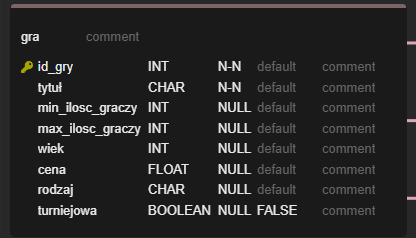

In [262]:
gry

['48', ' 1007']

SPICHLERZ RENTALOWY:
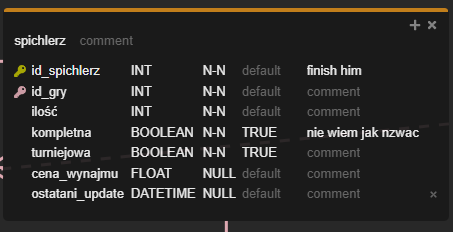

do zmodyfikowania - ilość się gryzie z id_spichlerza i kompletna <br> 
więc zrobiłabym id_spichlerz, id_gry, cena, ostatni_update <br>
zakładamy że tutaj mamy stałą ilość gier, można dodać jako ostatni_update dzień wymiany (gra poszła na outlet i wymieniła się z nową z naszego magazynu)

In [263]:
rent_inv ##dodać cenę wynajmu i update

,id_inv,id_tytuł
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
2452,2453,100
2453,2454,100
2454,2455,100
2455,2456,100


In [264]:
ceny = gry[["ID","CENA"]]
ceny = ceny.rename(columns = {"ID": "id_tytuł", "CENA": "cena"})
ceny

TypeError: list indices must be integers or slices, not list

In [265]:
ceny["cena"] = 0.15*ceny["cena"] ##15% ceny rynkowej gry za jej wynajem 

In [266]:
one = pd.merge(rent_inv, ceny, on="id_tytuł")
one

,id_inv,id_tytuł,cena
0,1,1,41.25
1,2,1,41.25
2,3,1,41.25
3,4,1,41.25
4,5,1,41.25
...,...,...,...
2452,2453,100,9.90
2453,2454,100,9.90
2454,2455,100,9.90
2455,2456,100,9.90


In [267]:
vv = np.array(rental_arch["id_inv"])
vv = [int(v) for v in vv] ##zmieniam te śmieszne floaty na int w id

In [268]:
rental_arch["id_inv"] = vv ##szukamy ostatniej wzmianki o tej grze
rental_arch

,id_inv,return,zniszczona
0,1055,2022-06-08 15:19:12,0.0
1,2022,2022-06-08 15:19:12,0.0
2,259,2022-06-08 15:19:12,0.0
0,894,2022-06-07 16:53:24,1.0
0,489,2022-06-08 15:22:48,0.0
...,...,...,...
1,1712,2023-06-21 12:45:00,0.0
0,446,2023-06-20 11:42:36,0.0
1,2282,2023-06-20 11:42:36,0.0
0,2041,2023-06-21 10:45:36,0.0


In [269]:
sub = rental_arch.drop_duplicates(subset=['id_inv'], keep='last')
sub ##biorę pod uwagę tylko ostatnie wypożyczenie danej gry

,id_inv,return,zniszczona
1,212,2022-06-08 11:33:36,0.0
0,1220,2022-06-08 14:48:36,0.0
0,232,2022-06-10 13:22:48,0.0
2,2312,2022-06-11 12:53:24,0.0
0,1957,2022-06-10 11:31:48,0.0
...,...,...,...
1,1712,2023-06-21 12:45:00,0.0
0,446,2023-06-20 11:42:36,0.0
1,2282,2023-06-20 11:42:36,0.0
0,2041,2023-06-21 10:45:36,0.0


In [270]:
spichlerz_wynajem = pd.merge(one,
                             sub[["id_inv","return"]], 
                             on=["id_inv"], how="left").rename(columns = 
                                                               {"id_inv": "id_spichlerz", "id_tytuł": "id_gry","return": "ostatni_update"})
spichlerz_wynajem

,id_spichlerz,id_gry,cena,ostatni_update
0,1,1,41.25,2023-02-21 13:24:36
1,2,1,41.25,2023-01-18 11:20:24
2,3,1,41.25,2023-03-18 11:43:12
3,4,1,41.25,2023-04-21 14:21:36
4,5,1,41.25,2022-12-05 14:19:48
...,...,...,...,...
2452,2453,100,9.90,2022-12-15 10:04:48
2453,2454,100,9.90,2023-04-09 13:23:24
2454,2455,100,9.90,2022-12-11 13:31:12
2455,2456,100,9.90,2022-09-28 10:43:48


ostatni update czyli kiedy wróciła do użytku

In [271]:
# te nany to można ustawić na początek działalności sklepu

SPICHLERZ SKLEPOWY
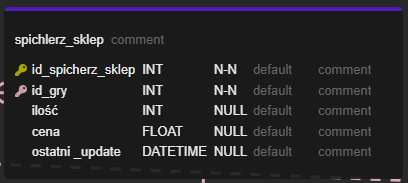

Ponownie gryzie się unikatowe id z ilością - ilość out, ostatni update to ostatni moment zakupu (wymiany tej gry z magazynu)?


In [272]:
shop_inv

,id_inv,id_tytuł
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
2380,2381,100
2381,2382,100
2382,2383,100
2383,2384,100


In [273]:
ceny = gry[["ID","CENA"]]
ceny = ceny.rename(columns = {"ID": "id_tytuł", "CENA": "cena"})
ceny["cena"] = 1.1*ceny["cena"] # bo marża 10%

TypeError: list indices must be integers or slices, not list

In [274]:
two = pd.merge(shop_inv, ceny, on="id_tytuł")
two

,id_inv,id_tytuł,cena
0,1,1,41.25
1,2,1,41.25
2,3,1,41.25
3,4,1,41.25
4,5,1,41.25
...,...,...,...
2380,2381,100,9.90
2381,2382,100,9.90
2382,2383,100,9.90
2383,2384,100,9.90


In [211]:
arch2 = shop_arch
ww = np.array(shop_arch["id_inv"])
ww = [int(v) for v in ww] 
arch2["id_inv"] = ww
arch2["kupno"] = [d + datetime.timedelta(days=1) for d in arch2["kupno"]]
arch2 ##bo wracają po 1 dniu od użycia - kupna
sub2 = arch2.drop_duplicates(subset=['id_inv'], keep='last') ##znowu patrzymy na ostatnie zakupy

spichlerz_sklep = pd.merge(two,
                             sub2[["id_inv","kupno"]], 
                             on=["id_inv"], how="left").rename(columns = 
                                                               {"id_inv": "id_spichlerz_sklep", "id_tytuł": "id_gry", "kupno": "ostatni_update"})
spichlerz_sklep

,id_spichlerz_sklep,id_gry,cena,ostatni_update
0,1,1,275.0,2023-03-25 09:00:00
1,2,1,275.0,2023-05-31 09:00:00
2,3,1,275.0,2023-05-25 09:00:00
3,4,1,275.0,NaT
4,5,1,275.0,2022-09-17 09:00:00
...,...,...,...,...
2511,2512,100,66.0,2023-02-24 09:00:00
2512,2513,100,66.0,2023-01-12 09:00:00
2513,2514,100,66.0,2023-06-20 09:00:00
2514,2515,100,66.0,2023-06-03 09:00:00


KLIENCI
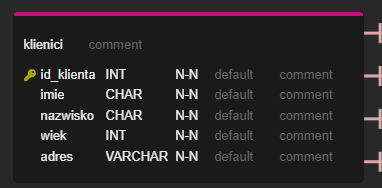

skleić ze sobą główną tabele (unikatowe id osób które nas odwiedziły) i podoklejać ich adresy, tel .. 

In [212]:
aa


,ID,IMIĘ,NAZWISKO,WIEK,ADRES,TELEFON
0,1,WERONIKA,KOWALEWSKA,52,Boczna 24,718847829
1,2,DANIEL,MARCINIAK,33,Maków 41,862020708
2,3,DOMINIK,BŁASZCZYK,87,Dziewanny 76,NULL
3,4,MONIKA,ŻAK,52,Smrekowa 89,738366120
4,5,KAMILA,PAWŁOWSKA,47,NULL,868727372
...,...,...,...,...,...,...
7344,7345,ANNA,ANDRZEJEWSKA,50,Jałowcowa 89,620103334
7345,7346,MARCIN,RUTKOWSKI,51,Koralowa 85,510131871
7346,7347,CZESŁAW,KAŹMIERCZAK,10,Bukowa 43,NULL
7347,7348,OLIVIER,JANIK,18,Kaszyska 52,790428598


In [213]:
klient = tabela_g.drop_duplicates(subset=['id_mieszkańca'], keep="last")[["id_mieszkańca", "wizyta"]]
KLIENCI = klient.rename(columns = {"id_mieszkańca": "ID"})
klienci = pd.merge(KLIENCI, aa, how = "inner", on = ["ID"]) ##aa to nasi ludzie


In [214]:
klienci["id_klienta"] = range(1, len(klienci)+1)
klienci = klienci.rename(columns = {"ID": "id_mieszkańca", "IMIĘ": "imię", "NAZWISKO": "nazwisko",
                                    "ADRES":"adres", "TELEFON": "telefon","WIEK":"wiek", "wizyta" : "ostatnia_wizyta"})
klienci = klienci[["id_klienta", "ostatnia_wizyta", "imię", "nazwisko", "wiek", "adres", "telefon", "id_mieszkańca"]] 
##quick zmiana kolejności
klienci

,id_klienta,ostatnia_wizyta,imię,nazwisko,wiek,adres,telefon,id_mieszkańca
0,1,2022-06-06 09:09:48,MARCIN,MALINOWSKI,14,Polna 7,829724599,1254
1,2,2022-06-06 09:12:30,SANDRA,KRUPA,21,Pod Brzegiem 81,606967935,435
2,3,2022-06-06 09:38:48,JAN,KRUPA,11,Za Goruszką 98,685307284,2350
3,4,2022-06-06 09:44:30,CECYLIA,PIĄTEK,44,Brzozowa 80,729675371,5291
4,5,2022-06-06 09:46:12,ZENON,CIESIELSKI,81,Zaciszna 86,664952484,3018
...,...,...,...,...,...,...,...,...
4486,4487,2023-06-19 14:29:54,MARLENA,MAZUR,35,Jaworowa 91,709981662,3478
4487,4488,2023-06-19 15:14:36,MAGDALENA,MICHALSKA,39,Jałowcowa 32,763421295,4555
4488,4489,2023-06-19 15:18:06,LESZEK,KOŁODZIEJ,31,Spacerowa 90,503282781,4290
4489,4490,2023-06-19 15:29:36,KAROL,PAWLIK,16,Wiejska 26,605139445,4850


TABELE TRANSAKCYJNE:

TRANSAKCJE WYNAJMU
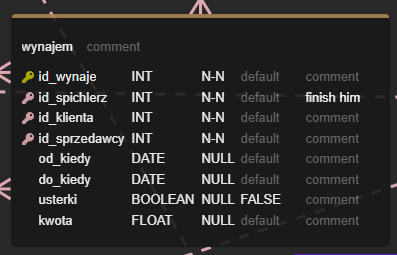

Łącząc tabelę główną z archiwum mamy id_spichlerza, id_klienta, sprzedawcy, od kiedy i do kiedy, usterki + kwota do sklejenia

In [215]:
rental_arch

,id_inv,return,zniszczona
0,778,2022-06-08 14:42:00,0.0
1,306,2022-06-08 14:42:00,0.0
2,515,2022-06-08 14:42:00,0.0
0,1715,2022-06-08 11:43:48,0.0
0,489,2022-06-08 13:26:24,0.0
...,...,...,...
0,313,2023-06-21 10:34:12,0.0
0,1629,2023-06-21 16:32:24,0.0
0,1583,2023-06-20 15:03:00,0.0
0,1352,2023-06-20 10:53:24,0.0


In [216]:
RENT = rental_arch.rename(columns = {"return": "return_date"})

In [219]:
sub = pd.merge(RENT, tabela_g, on = ["return_date"])[["id_inv", "wizyta", "return_date", "zniszczona", "id_mieszkańca", "sprzedawca"]]
sub

,id_inv,wizyta,return_date,zniszczona,id_mieszkańca,sprzedawca
0,778,2022-06-06 09:09:48,2022-06-08 14:42:00,0.0,1254,2
1,306,2022-06-06 09:09:48,2022-06-08 14:42:00,0.0,1254,2
2,515,2022-06-06 09:09:48,2022-06-08 14:42:00,0.0,1254,2
3,1715,2022-06-06 09:12:30,2022-06-08 11:43:48,0.0,435,1
4,489,2022-06-06 09:15:12,2022-06-08 13:26:24,0.0,4255,2
...,...,...,...,...,...,...
6203,313,2023-06-19 13:14:54,2023-06-21 10:34:12,0.0,3,2
6204,1629,2023-06-19 13:34:42,2023-06-21 16:32:24,0.0,1152,2
6205,1583,2023-06-19 14:25:18,2023-06-20 15:03:00,0.0,4749,2
6206,1352,2023-06-19 14:28:48,2023-06-20 10:53:24,0.0,6755,2


In [218]:
tabela_g

,id_mieszkańca,wizyta,sprzedawca,ilosc,id_gry,rodzaj,return_date
0,1147,2022-06-06 09:09:36,2,2,"2314, 995",kupno,None
0,1254,2022-06-06 09:09:48,2,3,"778, 306, 515",wynajem,2022-06-08 14:42:00
0,435,2022-06-06 09:12:30,1,1,1715,wynajem,2022-06-08 11:43:48
0,4255,2022-06-06 09:15:12,2,1,489,wynajem,2022-06-08 13:26:24
0,1930,2022-06-06 09:15:30,1,2,"40, 159",kupno,None
...,...,...,...,...,...,...,...
0,3478,2023-06-19 14:29:54,2,1,1105,wynajem,2023-06-20 15:31:12
0,4555,2023-06-19 15:14:36,2,1,430,kupno,None
0,4290,2023-06-19 15:18:06,1,1,2451,kupno,None
0,4850,2023-06-19 15:29:36,2,1,986,kupno,None


In [223]:
wynajem2 = pd.merge(SUB, aa, how = "inner", on = ["ID"])
wynajem2

,id_inv,wizyta,return_date,zniszczona,ID,sprzedawca,IMIĘ,NAZWISKO,WIEK,ADRES,TELEFON
0,778,2022-06-06 09:09:48,2022-06-08 14:42:00,0.0,1254,2,MARCIN,MALINOWSKI,14,Polna 7,829724599
1,306,2022-06-06 09:09:48,2022-06-08 14:42:00,0.0,1254,2,MARCIN,MALINOWSKI,14,Polna 7,829724599
2,515,2022-06-06 09:09:48,2022-06-08 14:42:00,0.0,1254,2,MARCIN,MALINOWSKI,14,Polna 7,829724599
3,1715,2022-06-06 09:12:30,2022-06-08 11:43:48,0.0,435,1,SANDRA,KRUPA,21,Pod Brzegiem 81,606967935
4,489,2022-06-06 09:15:12,2022-06-08 13:26:24,0.0,4255,2,ALEKSANDER,MAJEWSKI,8,Różana 90,882464450
...,...,...,...,...,...,...,...,...,...,...,...
6203,1507,2023-06-19 11:58:48,2023-06-21 15:17:24,0.0,4,2,MONIKA,ŻAK,52,Smrekowa 89,738366120
6204,2120,2023-06-19 11:58:48,2023-06-21 15:17:24,0.0,4,2,MONIKA,ŻAK,52,Smrekowa 89,738366120
6205,1629,2023-06-19 13:34:42,2023-06-21 16:32:24,0.0,1152,2,SVITLANA,SZEWCZYK,26,Chabrowa 71,773009247
6206,1583,2023-06-19 14:25:18,2023-06-20 15:03:00,0.0,4749,2,ALICJA,KOŁODZIEJ,64,Kalwaria 3,940696035


In [220]:
SUB = sub.rename(columns = {"id_mieszkańca": "ID"})
wynajem2 = pd.merge(SUB, aa, how = "inner", on = ["ID"])
wynajem2 = wynajem2.rename(columns = {"ID": "id_mieszkańca", "IMIĘ": "imię", "NAZWISKO": "nazwisko",
                                    "ADRES":"adres", "TELEFON": "telefon","WIEK":"wiek"})
wynajem = pd.merge(wynajem2, klienci[["id_mieszkańca", "id_klienta"]], how="left", on = "id_mieszkańca")

In [221]:
wynajem['wizyta'] = pd.to_datetime(wynajem['wizyta'])
wyn = wynajem.sort_values(by = "wizyta", inplace=False, ascending=True)
ww = wyn[["id_inv", "wizyta", "return_date", "zniszczona", "id_klienta", "sprzedawca"]].rename(columns={"id_inv":"id_spichlerz"})
ww

,id_spichlerz,wizyta,return_date,zniszczona,id_klienta,sprzedawca
0,778,2022-06-06 09:09:48,2022-06-08 14:42:00,0.0,1,2
1,306,2022-06-06 09:09:48,2022-06-08 14:42:00,0.0,1,2
2,515,2022-06-06 09:09:48,2022-06-08 14:42:00,0.0,1,2
3,1715,2022-06-06 09:12:30,2022-06-08 11:43:48,0.0,2,1
4,489,2022-06-06 09:15:12,2022-06-08 13:26:24,0.0,3588,2
...,...,...,...,...,...,...
3185,313,2023-06-19 13:14:54,2023-06-21 10:34:12,0.0,4481,2
6205,1629,2023-06-19 13:34:42,2023-06-21 16:32:24,0.0,4484,2
6206,1583,2023-06-19 14:25:18,2023-06-20 15:03:00,0.0,4485,2
6207,1352,2023-06-19 14:28:48,2023-06-20 10:53:24,0.0,4486,2


In [222]:
pd.merge(ww, spichlerz_wynajem[["id_spichlerz","cena"]], on=["id_spichlerz"], how="left")

,id_spichlerz,wizyta,return_date,zniszczona,id_klienta,sprzedawca,cena
0,778,2022-06-06 09:09:48,2022-06-08 14:42:00,0.0,1,2,6.0
1,306,2022-06-06 09:09:48,2022-06-08 14:42:00,0.0,1,2,24.0
2,515,2022-06-06 09:09:48,2022-06-08 14:42:00,0.0,1,2,57.0
3,1715,2022-06-06 09:12:30,2022-06-08 11:43:48,0.0,2,1,6.0
4,489,2022-06-06 09:15:12,2022-06-08 13:26:24,0.0,3588,2,39.0
...,...,...,...,...,...,...,...
6203,313,2023-06-19 13:14:54,2023-06-21 10:34:12,0.0,4481,2,24.0
6204,1629,2023-06-19 13:34:42,2023-06-21 16:32:24,0.0,4484,2,16.5
6205,1583,2023-06-19 14:25:18,2023-06-20 15:03:00,0.0,4485,2,6.0
6206,1352,2023-06-19 14:28:48,2023-06-20 10:53:24,0.0,4486,2,16.5


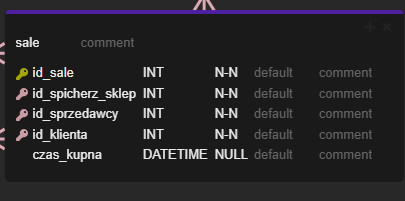

In [284]:
shop = tt[2]
shop['wizyta'] = pd.to_datetime(shop['wizyta'])


In [280]:
tabela_g

,id_mieszkańca,wizyta,sprzedawca,ilosc,id_gry,rodzaj,return_date
0,3670,2022-06-06 09:04:36,2,1,526,kupno,None
0,6121,2022-06-06 09:39:48,2,1,2355,kupno,None
0,189,2022-06-06 09:49:30,2,3,"1055, 2022, 259",wynajem,2022-06-08 15:19:12
0,5746,2022-06-06 09:51:24,1,1,2310,kupno,None
0,563,2022-06-06 10:11:06,2,1,1580,kupno,None
...,...,...,...,...,...,...,...
0,289,2023-06-19 15:11:42,1,1,1048,wynajem,2023-06-21 10:30:36
0,344,2023-06-19 15:14:30,1,2,"673, 1712",wynajem,2023-06-21 12:45:00
0,1419,2023-06-19 16:07:30,2,2,"446, 2282",wynajem,2023-06-20 11:42:36
0,1488,2023-06-19 16:17:36,1,1,2041,wynajem,2023-06-21 10:45:36


In [285]:
pd.merge(shop, tabela_g, on="wizyta", how="left")

,id_inv,kupno,wizyta,id_mieszkańca,sprzedawca,ilosc,id_gry,rodzaj,return_date
0,526.0,2022-06-06 09:00:00,2022-06-06 09:04:36,3670,2,1,526,kupno,None
1,2355.0,2022-06-06 09:00:00,2022-06-06 09:39:48,6121,2,1,2355,kupno,None
2,2310.0,2022-06-06 09:00:00,2022-06-06 09:51:24,5746,1,1,2310,kupno,None
3,1580.0,2022-06-06 09:00:00,2022-06-06 10:11:06,563,2,1,1580,kupno,None
4,1585.0,2022-06-06 09:00:00,2022-06-06 10:13:18,749,2,1,1585,kupno,None
...,...,...,...,...,...,...,...,...,...
6724,2117.0,2023-06-19 09:00:00,2023-06-19 14:54:30,6567,1,2,"2117, 2026",kupno,None
6725,2026.0,2023-06-19 09:00:00,2023-06-19 14:54:30,6567,1,2,"2117, 2026",kupno,None
6726,795.0,2023-06-19 09:00:00,2023-06-19 14:56:06,5534,1,2,"795, 2168",kupno,None
6727,2168.0,2023-06-19 09:00:00,2023-06-19 14:56:06,5534,1,2,"795, 2168",kupno,None


In [246]:
kup = tabela_g[tabela_g["rodzaj"] == "kupno"][["id_mieszkańca", "wizyta", "sprzedawca", "ilosc", "id_gry"]]
kup1 = kup[kup["ilosc"] == 1]
kup2 = kup[kup["ilosc"] > 1]


In [249]:
kup2.loc[kup2.index.repeat(kup2["ilosc"])]

,id_mieszkańca,wizyta,sprzedawca,ilosc,id_gry
0,1147,2022-06-06 09:09:36,2,2,"2314, 995"
0,1930,2022-06-06 09:15:30,1,2,"40, 159"
0,5291,2022-06-06 09:44:30,1,2,"202, 2083"
0,6790,2022-06-06 11:15:30,1,2,"1058, 1813"
0,937,2022-06-07 09:06:00,2,3,"611, 874, 1731"
...,...,...,...,...,...
0,756,2023-06-17 16:40:30,2,2,"858, 1148"
0,4575,2023-06-19 09:34:06,1,3,"2337, 2514, 2273"
0,861,2023-06-19 12:59:18,2,3,"2115, 853, 2438"
0,4339,2023-06-19 13:11:54,2,2,"797, 827"


do tego:<br>
1. SPRZEDAWCY
2. INFO O SKLEPIE (godz otwarcia, adres, telefon, mail, ilosc pracowników, fax czy co tam jeszcze xd)
 <BR>

### NO I TURNIEJE